<a href="https://colab.research.google.com/github/Dhawaldwivedi/Bca-5th-sem-AI-mmdu/blob/main/ai-ml2-g1/Deep_Learning_Mnist_CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [29]:
print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


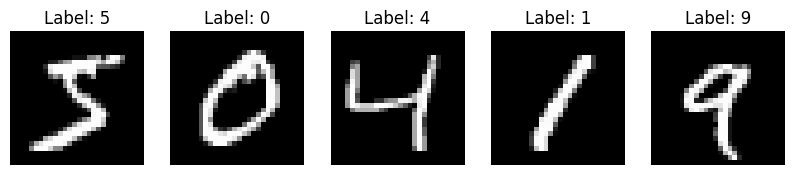

In [30]:
# Display first 5 images
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [31]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0


In [32]:
print(x_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Build the Feedforward Neural Network**

A simple 3-layer architecture:

Input layer: 784 neurons (28x28 pixels)

Hidden layer: 128 neurons, activation = ReLU

Output layer: 10 neurons, activation = Softmax

In [34]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    layers.Dense(10, activation='softmax')                     # Output layer
])


In [35]:
# compiling
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8686 - loss: 0.4613 - val_accuracy: 0.9645 - val_loss: 0.1309
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9632 - loss: 0.1291 - val_accuracy: 0.9710 - val_loss: 0.0962
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9772 - loss: 0.0794 - val_accuracy: 0.9753 - val_loss: 0.0838
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0582 - val_accuracy: 0.9755 - val_loss: 0.0824
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9790 - val_loss: 0.0763


In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0898
Test Accuracy: 0.9772999882698059


In [39]:
predictions = model.predict(x_test[:50])
print("plabels:", predictions.argmax(axis=1))
print("Tlabels:", y_test[:50])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
plabels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Tlabels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
